# 习题 9.1

如例9.1的三硬币模型，假设观测数据不变，试选择不同的处置，例如，$\pi^{(0)}=0.46,p^{(0)}=0.55,q^{(0)}=0.67$，求模型参数为$\theta=(\pi,p,q)$的极大似然估计。

In [1]:
import numpy as np
import math

In [2]:
class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob
        
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow((1-self.pro_B), 1-data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow((1-self.pro_C), 1-data[i])
        return pro_1 / (pro_1 + pro_2)
    
    def fit(self, data):
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B, self.pro_C))
        count = len(data)
        theta = 1
        d = 0
        while(theta > 0.00001):
            # 迭代阻塞
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1/ count * sum(_pmf)
            pro_B = sum([_pmf[k]*data[k] for k in range(count)]) / sum([_pmf[k] for k in range(count)])
            pro_C = sum([(1-_pmf[k])*data[k] for k in range(count)]) / sum([(1-_pmf[k]) for k in range(count)])
            d += 1
            print('{}  pro_a:{:.4f}, pro_b:{:.4f}, pro_c:{:.4f}'.format(d, pro_A, pro_B, pro_C))
            theta = abs(self.pro_A-pro_A) + abs(self.pro_B-pro_B) + abs(self.pro_C-pro_C)
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [3]:
# 加载数据
data=[1,1,0,1,0,0,1,0,1,1]

In [4]:
em = EM(prob=[0.46, 0.55, 0.67])
f = em.fit(data)

init prob:0.46, 0.55, 0.67
1  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
2  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561


可见通过两次迭代，参数已经收敛，三个硬币的概率分别为0.4619，0.5346，0.6561

# 习题9.3

已知观测数据  
-67，-48，6，8，14，16，23，24，28，29，41，49，56，60，75  
试估计两个分量的高斯混合模型的5个参数。

## sklearn.mixture.GaussianMixture

__参数：__ 
- __n_components：__ 混合高斯模型个数，默认为1 
- __covariance_type：__ 协方差类型，包括{‘full’,‘tied’, ‘diag’, ‘spherical’}四种，分别对应完全协方差矩阵（元素都不为零），相同的完全协方差矩阵（HMM会用到），对角协方差矩阵（非对角为零，对角不为零），球面协方差矩阵（非对角为零，对角完全相同，球面特性），默认‘full’ 完全协方差矩阵 
- __tol：__ EM迭代停止阈值，默认为1e-3. 
- __reg_covar：__ 协方差对角非负正则化，保证协方差矩阵均为正，默认为0 
- __max_iter：__ 最大迭代次数，默认100 
- __n_init：__ 初始化次数，用于产生最佳初始参数，默认为1 
- __init_params：__ {‘kmeans’, ‘random’}, defaults to ‘kmeans’.初始化参数实现方式，默认用kmeans实现，也可以选择随机产生 
- __weights_init：__ 各组成模型的先验权重，可以自己设，默认按照init_params产生 
- __means_init：__ 初始化均值，默认按照init_params产生
- __precisions_init：__ 初始化精确度（模型个数，特征个数），默认按照init_params实现 
- __random_state：__ 随机数发生器 
- __warm_start：__ 若为True，则fit（）调用会以上一次fit（）的结果作为初始化参数，适合相同问题多次fit的情况，能加速收敛，默认为False。 
- __verbose：__ 展示迭代信息，默认为0，可以为1或者大于1（显示的信息不同） 
- __verbose_interval：__ 若展示迭代信息，设置多少次迭代后显示信息，默认10次。

In [5]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 初始化观测数据
data=np.array([-67, -48, 6, 8, 14, 16, 23, 24, 28, 29, 41, 49, 56, 60, 75]).reshape(-1, 1)

In [7]:
# 聚类
gmmModel = GaussianMixture(n_components=2)
gmmModel.fit(data)
labels = gmmModel.predict(data)
print("labels =", labels)

labels = [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


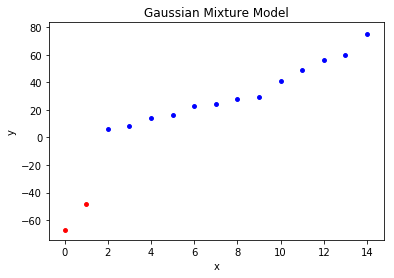

means = [[-57.51107027  32.98489643]]
covariances = [[ 90.24987882 429.45764867]]
weights =  [[0.13317238 0.86682762]]


In [8]:
for i in range(0,len(labels)):
    if labels[i] == 0:
        plt.scatter(i, data.take(i), s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(i, data.take(i), s=15, c='blue')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("means =", gmmModel.means_.reshape(1, -1))
print("covariances =", gmmModel.covariances_.reshape(1, -1))
print("weights = ", gmmModel.weights_.reshape(1, -1))